## Lecture 4 Pandas

### Table of contents

1. [Pandas](#pandas)

In [7]:
import sys
import pandas as pd

import numpy as np

In [3]:
print(f'Python version {sys.version}')
print(f'Pandas version {pd.__version__}')

Python version 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]
Pandas version 1.4.4


## Data structures in pandas

### Series
* 1D labeled array able to hold any data type (int,str,float, Python objects, etc.)

In [4]:
pd.Series([1,-1,1,-1]).index

RangeIndex(start=0, stop=4, step=1)

`data` (in the example above) can be:
    * a dict
    * a list
    * an ndarray
    * a scalar value


Examples of from dict and a scalar value below:

In [5]:
# in case of dictionary
pd.Series({'aa':1, 'aaa':'b', 'aaa':'g'})

aa     1
aaa    g
dtype: object

In [8]:
pd.Series(np.arange(5), index=['a', 'b', 'c', 'd','e'])

a    0
b    1
c    2
d    3
e    4
dtype: int32

* a key difference between Series/pandas and ndarray: operations between Series automatically align the data based on label

In [10]:
a = pd.Series({'Vítek':5, 'Martin':10, 'Honza':0})
b = pd.Series({'Martin':20,'Honza':15,'Vítek':5})
print(f'A:\n{a}\nB:\n{b}')
a+ b

A:
Vítek      5
Martin    10
Honza      0
dtype: int64
B:
Martin    20
Honza     15
Vítek      5
dtype: int64


Honza     15
Martin    30
Vítek     10
dtype: int64

In [11]:
a = [5,10,0]
b = [20,15,5]

np.array(a) + np.array(b) # now works as expected

array([25, 25,  5])

* looping through (value-by-value) usually not necessary, remember the case of np array

###  DataFrame

* a 2D labeled data structure with columns of potentially different types
* like a spreadsheet or SQL table, or a dict of Series objects
* the most frequently used pandas object 
* can be created:
    * typically by reading a csv file
    * dict of 1D ndarrays, lists, dicts, Series
    * 2D numpy.ndarray
    * a Series
    * another DataFrame

In [12]:
pd.DataFrame({'var':[1,2,3], 'column2':[0,0,0]})

,var,column2
0,1,0
1,2,0
2,3,0


In [13]:
pd.DataFrame([{'var':1,'column2':0},{'var':2,'column2':0},{'var':3,'column2':0}])

,var,column2
0,1,0
1,2,0
2,3,0


In [14]:
# from dict of Series
d = {'one': pd.Series([1., 2., 3.],     index=['a', 'e', 'c']),
     'two': pd.Series([2., 1., 3., 4.], index=['b', 'a', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,NaN,2.0
c,3.0,3.0
d,NaN,4.0
e,2.0,NaN


Now that we have our data unzipped, we can load them into Python, specifically using Pandas tools.

### Data I/O (in/out)
* CSV, JSON, HTML, Excel, HDF5, SQL, pickle, ...
    * for specific details, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* `pd.read_csv()` is the workhorse for reading text files
    * large number of params means great flexibility when getting data in
    
We will work with the course evaluation data from FSV.
  * each observation is a response to the following questionare (... hope it reminds you of something)

In [16]:
# load the "raw" data for one particular year
df = pd.read_csv('auxiliary/data_2017_zs.csv', sep = ';', on_bad_lines= 'skip')
df.head()

,cislo_dot,kod_predm,nazev_predm,prednasejici,cvicici,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,t1,t2,katedra_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [79]:
# raw data have column names in czech, let's rename them
# if you do not want to reassign, you can provide arg. "inplace = True"
df = df.rename(columns = {
    'cislo_dot' : 'number',
    'kod_predm' : 'course_code',
    'nazev_predm' : 'course_title',
    'prednasejici' : 'teachers',
    'cvicici' : 'seminar_leaders',
    't1': 'c_value',
    't2': 'c_improve', 
    'katedra_code' : 'department_code'
})
df.head(10)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies
6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,NaN,NaN,NaN,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies
8,JEB058,Seminář matematické analýzy I,NaN,"Stráský,J.",4.0,4.0,NaN,NaN,NaN,4.0,5.0,5.0,1.0,1.0,2.0,3.0,5.0,NaN,NaN,ies
9,JPM561,Regional Security Studies,"Karásek,T.,Klosek,K.","Karásek,T.,Klosek,K.",5.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,1.0,5.0,4.0,5.0,5.0,NaN,NaN,kbs


In [78]:
# iterative
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997],
           dtype='int64', name='number', length=6995)

In [77]:
# set column named "course_code" to be an index (or you can use "inplace" option again)
df.set_index('number', inplace=True)

In [81]:
df.shape

(6995, 20)

In [90]:
df.course_code

number
1        JEB003
2        JLB003
3       NMMA701
4        JEB023
5        JEB055
         ...   
6993     JJM260
6994     JJM264
6995     JJM360
6996     JJM354
6997     JJM340
Name: course_code, Length: 6995, dtype: object

In [80]:
# look at the data but refrain from drawing the conclusions
df.head(5)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [ ]:
# make a copy of original data, so if you mess up, can go back to this
# not that smart when you are working with the large data
df_copy = df.copy(deep = True)

* `pd.DataFrame.copy()`:
    * deep: modifications to the data or indices of the copy will not be reflected in the original object
    * shallow: any changes to the data of the original will be reflected in the shallow copy (and vice versa)

In [91]:
# try to call it as a function
# df.shape() # it si an attribute not a function
df.shape

(6995, 20)

In [92]:
# classical data summarization
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
count,6847.000000,6827.000000,5458.000000,5457.000000,5458.000000,2600.000000,2600.000000,2600.000000,6776.000000,6829.000000,6783.000000,6801.000000,6798.00000
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,3.000000,4.00000
50%,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000,4.000000,4.000000,5.00000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [93]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 1 to 6997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_code      6995 non-null   object 
 1   course_title     6995 non-null   object 
 2   teachers         5434 non-null   object 
 3   seminar_leaders  2588 non-null   object 
 4   q1               6847 non-null   float64
 5   q2               6827 non-null   float64
 6   q3               5458 non-null   float64
 7   q4               5457 non-null   float64
 8   q5               5458 non-null   float64
 9   q6               2600 non-null   float64
 10  q7               2600 non-null   float64
 11  q8               2600 non-null   float64
 12  q9               6776 non-null   float64
 13  q10              6829 non-null   float64
 14  q11              6783 non-null   float64
 15  q12              6801 non-null   float64
 16  q13              6798 non-null   float64
 17  c_value       

In [ ]:
# memory usage of each column in bytes (useful when working with the larger datasets)
df.memory_usage()

* you can treat a DataFrame semantically like a dict of like-indexed Series objects
    * getting, setting, and deleting columns works with the same syntax as the analogous dict operations

## Indexing/Selection

| Operation                      | Syntax        |  Result   |
|--------------------------------|---------------|-----------|
| Select column                  | df[col]       |  Series   |
| Select row by label            | df.loc[label] |  Series   |
| Select row by integer location | df.iloc[loc]  |  Series   |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |

In [94]:
# gives us series
df['course_title']

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [ ]:
#this demonstrates usefullness of proper column naming
df.course_title

In [96]:
# multple columns -> gives us dataframe
df[['course_title']]

,course_title
number,
1,Ekonomie I
2,Angličtina pro ekonomy I
3,Matematika 1
4,Úvod do studia práva
5,Seminář k aktualitám I
...,...
6993,Novinářská etika v praxi
6994,Diplomový seminář II.
6995,Ekonomika v médiích


In [ ]:
# just one column: just convenience (if column name has a space or dot, you are screwed)
#naming conventions: no special character, underscore for spaces, no CZECH chars! informative and short
df.course_title

In [ ]:
# subset of columns you want 
df[['course_title','teachers']].head(10)

In [97]:
# list of all columns 
df.columns

Index(['course_code', 'course_title', 'teachers', 'seminar_leaders', 'q1',
       'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12',
       'q13', 'c_value', 'c_improve', 'department_code'],
      dtype='object')

In [98]:
# adding columns (first adding, so we have something to drop)
df['tmp'] = '11/10'
# you can also use assign function, if new column should be a function of original column 
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10


In [ ]:
df['sumq1q2'] = df.q1+df.q2
df.head()

In [ ]:
# drop column (you can also use 'del' (a general python comand for deleting)
df.drop('tmp', axis = 1, inplace = True) # axis to specify you want to drop column, inplace operation in this case

In [105]:
df[(df.department_code == 'ies') & (df.teachers.str.contains('Červinka'))]

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
36,JEB105,Statistics,"Červinka,M.","Červinka,M.",4.0,5.0,5.0,4.0,3.0,5.0,...,5.0,1.0,3.0,4.0,2.0,3.0,NaN,NaN,ies,11/10
42,JEB105,Statistics,"Červinka,M.","Hanus,L.",5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,2.0,5.0,5.0,5.0,5.0,Přístup vyučujících a pana Červinky k předmětu...,"Možná jasnější prezentace, slidy byly někdy ve...",ies,11/10
327,JEB105,Statistics,"Červinka,M.","Smutná,Š.",5.0,4.0,4.0,5.0,4.0,4.0,...,5.0,1.0,5.0,5.0,4.0,5.0,Jako student ekonomické teorii považuji tento ...,Když tento předmět srovnám s výukou matematiky...,ies,11/10
387,JEB105,Statistics,"Červinka,M.","Hanus,L.",5.0,4.0,4.0,5.0,4.0,4.0,...,5.0,1.0,5.0,4.0,4.0,4.0,Oceňuji komentáře pana Červinky k našim hodnoc...,Měl bych poznámku ohledně prezentací. U někter...,ies,11/10
882,JEB105,Statistics,"Červinka,M.","Nevrla,M.",5.0,4.0,5.0,5.0,3.0,3.0,...,3.0,1.0,5.0,5.0,5.0,5.0,I když jsem byla jen na první přednášce a prvn...,Možná bych ocenila více tipů na literaturu (na...,ies,11/10
943,JEB105,Statistics,"Červinka,M.","Červinka,M.",5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,4.0,5.0,NaN,NaN,ies,11/10
1003,JEB105,Statistics,"Červinka,M.","Hanus,L.",4.0,5.0,4.0,3.0,5.0,4.0,...,5.0,1.0,5.0,5.0,5.0,4.0,NaN,NaN,ies,11/10
1418,JEB105,Statistics,"Červinka,M.","Nevrla,M.",4.0,5.0,4.0,5.0,5.0,5.0,...,5.0,1.0,NaN,NaN,NaN,NaN,"Domácí úkoly byly časově velice náročné, ale m...",NaN,ies,11/10
1429,JEB105,Statistics,"Červinka,M.","Červinka,M.",5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,11/10


In [101]:
df[df.department_code == 'ies']

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,JEB105,Statistics,"Červinka,M.","Smutná,Š.",2.0,4.0,1.0,2.0,2.0,5.0,...,5.0,1.0,4.0,4.0,3.0,1.0,"Domácí úkoly, ačkoliv systém hodnocení je extr...",Přednášky. Pan Červinka se vše snaží dělat mno...,ies,11/10
6976,NMMA703,Matematika 3,"Zelený,M.","Zelený,M.",5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,11/10
6977,JEB114,Macroeconomics I,"Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.","Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,ies,11/10


### loc and Idioms
* `.loc` selects data by the label of the rows and columns (as opposed to the `.iloc`) integer location
* we can also use `.loc` for subsetting based on condition(s)

In [106]:
df.loc[5:25:3,['department_code','teachers']]

,department_code,teachers
number,,
5,ies,NaN
8,ies,NaN
11,cjp,NaN
14,ks,"Hendl,J."
17,ks,"Bureš,J.,Numerato,D."
20,kvsp,"Vlk,A."
23,ks,"Soukup,P."


#### Subset using a mask

In [107]:
# select only observations for IES only
df_ies = df.loc[df['department_code'] == 'ies']

In [108]:
df_ies.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10


In [109]:
# select only observations for Advanced Econometrics
df.loc[df['course_title'] == 'Advanced Econometrics'].head(2)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
89,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,1.0,5.0,5.0,5.0,1.0,Mr.Barunik is very sexy,NaN,ies,11/10
973,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,3.0,5.0,4.0,4.0,NaN,NaN,ies,11/10


In [110]:

# subsetting based on multiple conditions: AE and non-missing comment on what to improve
df.loc[(df['course_title'] == 'Advanced Econometrics') & (~df['c_improve'].isnull())].head(2)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1138,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,3.0,...,3.0,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies,11/10
1870,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",3.0,5.0,5.0,5.0,5.0,3.0,...,3.0,1.0,3.0,3.0,2.0,3.0,Positive atmosphere the lecturer provided,It was too theoretical and abstract. Since it ...,ies,11/10


* Sometimes, we don't have a clear list of columns to be selected ready, e.g. how to select columns from q1 to q13? 
    * using actual list of column names :(
        * be lazy!
    * or ... 

In [ ]:
# list comprehension
print([x for x in df.columns if 'q' in x]) #by substring
print([x for x in df.columns if (len(x) == 2) | (len(x) == 3)]) #by length
print([x for x in df.columns if x.startswith('q')]) #by first letter
# by regular expression is the safest - q and then at most 2 digit number -> later in course

In [112]:
[x for x in df.columns if 'q' in x]

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13']

In [111]:
df_q = df[[x for x in df.columns if 'q' in x]]
df_q.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
number,,,,,,,,,,,,,
1,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0
2,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0
3,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0
4,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0
5,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0


### Using functions on pandas objects

| Operation          | Function              |
|--------------------|-----------------------|
| Row or Column-wise | `apply()`             |
| Aggregation        | `agg() / transform()` |
| Elementwise        | `applymap()`          |

**Tablewise**
* DFs and Series can be arguments of the functions
* if multiple functions need to be called in a sequence, use `pipe()` method, also called the method chaining
    * often used in the data science setting
    * inspired by unix pipes and dplyr (%>%) operator in R 

**Row or Column-wise Function Application**
* `apply()` is extremely powerful, when used with some brainpower

In [ ]:
df_q.apply(np.mean, axis = 0)

In [ ]:
# using lambda - anonymous function
#standardization to unit variance
df_q.apply(lambda x: (x - np.mean(x)) / np.std(x), axis = 0)

In [ ]:
# using custom function, with arguments (could have also be done with lambda)
def add_and_substract(df, sub = 1, add = 1):
    return df - sub + add
df_q.apply(add_and_substract, args = (0,0))

In [ ]:
# A little bit more sophisticated:  show the longest  comment
df.loc[df['c_value'].apply(lambda x: len(str(x))).idxmax(),'c_value']

**Aggregation**
* *`aggregate()`* and *`transform()`*
* aggregation allows multiple aggregation operations in a single concise way
* `transform()` method returns an object that is indexed the same as the original
   * allows multiple operations at the same time, instead of one-by-one as `aggregate()` method

In [ ]:
# aggregating simple function is the same as apply
df_q.agg(np.mean, axis = 0)

In [ ]:
# aggregating more functions more interesting (you could do your own describe function easily! )
df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)

In [ ]:
# aggregating using dictionary, i.e. column specific aggregation 
df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})

In [ ]:
# using single function, the same as with apply
df_q.transform(lambda x: np.power(x,2))

In [ ]:
# using multiple functions (can also be done using dictionary as in the case of aggregate)
df_q.transform([np.abs, lambda x: x + 1])

## Missing values

In [116]:
df.teachers.notnull()

number
1        True
2       False
3        True
4        True
5       False
        ...  
6993     True
6994    False
6995     True
6996     True
6997     True
Name: teachers, Length: 6995, dtype: bool

In [113]:
df[df.teachers.notnull()]

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,NaN,...,NaN,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv,11/10
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,11/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,JPM620,Geopolitical Thought,"Kofroň,J.",NaN,3.0,4.0,3.0,3.0,3.0,NaN,...,NaN,1.0,4.0,3.0,4.0,3.0,NaN,NaN,kp,11/10
6993,JJM260,Novinářská etika v praxi,"Moravec,V.",NaN,5.0,5.0,5.0,5.0,5.0,NaN,...,NaN,1.0,5.0,4.0,5.0,5.0,"Tlak ze strany vyucujicicho - eseje, pestovani...",Vetsi ucebnu?,kz,11/10
6995,JJM360,Ekonomika v médiích,"Klimeš,D.",NaN,5.0,4.0,5.0,5.0,4.0,NaN,...,NaN,2.0,5.0,3.0,5.0,5.0,Hosty a jejich prednasky.,NaN,kz,11/10


% of missing observations for specific column

In [ ]:
df['q1'].isnull().sum() / df['q1'].isnull().count()

% of missing observations for all columns

<AxesSubplot: >

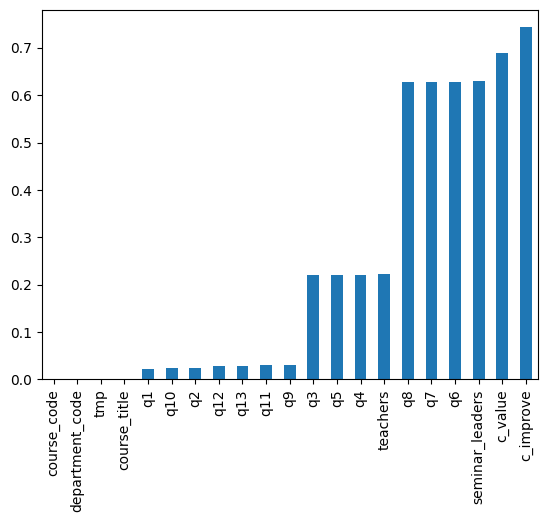

In [123]:
(df.isnull().sum()/df.shape[0]).sort_values().plot.bar()

<AxesSubplot: >

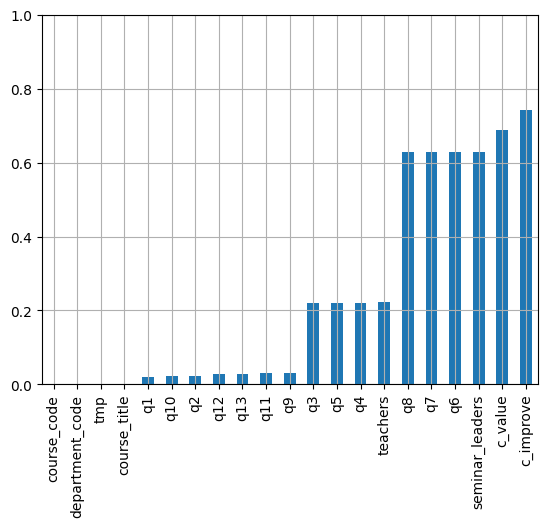

In [117]:
(df.isnull().sum()/df.shape[0]).sort_values().plot.bar(ylim=(0,1),grid=True)

## Data ex

https://web.archive.org/web/20180506061559/http://lisp.vse.cz/pkdd99/Challenge/chall.htm

In [8]:
import os

In [10]:
files = os.listdir('auxiliary/data_ex')

In [11]:
files

['account.asc',
 'card.asc',
 'client.asc',
 'disp.asc',
 'district.asc',
 'loan.asc',
 'order.asc',
 'trans.asc']

In [14]:
data = {}
for file_name in files: 
    data[file_name.split('.')[0]] = pd.read_table('auxiliary/data_ex/' + file_name, sep = ';')
    

C:\Users\Martin Hronec\AppData\Local\Temp\ipykernel_22912\2341300206.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data[file_name.split('.')[0]] = pd.read_table('auxiliary/data_ex/' + file_name, sep = ';')


In [16]:
data['account']

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
...,...,...,...,...
4495,124,55,POPLATEK MESICNE,971228
4496,3958,59,POPLATEK MESICNE,971228
4497,777,30,POPLATEK MESICNE,971228
4498,1573,63,POPLATEK MESICNE,971229


## Matplotlib <a name="introduction"></a>

* "A picture is worth a thousand words."
    * more like "A picture is worth a few lines of code."
* development started in 2003 by John D. Hunter, a neurobiologist (inspired by MATLAB software)
* generating basic plots in *matplotlib* is simple, mastering the library can be little bit less pleseant (we skip this part)
* you can have as much control as you want, but you can also concede as much control as you want 
* [**gallery**](https://matplotlib.org/stable/gallery/index.html)
    * can get help to problems like "I want to make a figure that looks something I've seen somewhere." (hard to google)
* plotting consists of many layers, from general 'contour this 2D array' to very specific 'color this screen pixel'
    * key is allowing both levels to coexist in one package
* *matplotlib* has 2 interfaces:
    1. "state-machine environment" (based on MATLAB)
    2. a object-oriented interface
* this often creates confusion (multiple, conflicting, solutions on the web)
* another common confusion is the relationship of *Matplotlib, pyplot and pylab*
    * Matplotlib is the whole package
    * `matplotlib.pyplot` is a module in matplotlib
    * `pylab` is a a convenience module doing a bulk import of `pyplot` and `numpy`

* [anatomy of the plot](https://matplotlib.org/examples/showcase/anatomy.html) from matplotlib

<img src= "https://matplotlib.org/_images/anatomy.png" width= "600" height="400">

* the *figure* keeps track of all the child *Axes*, titles,legends, etc.
    * the figure can have any number of *Axes*
* *Axes* is 'a plot', i.e. the region of the image with the data space
    * given *Axes* object can only be in one Figure
    * *Axes* contains 2 (3 in case of 3D) *Axis* objects which take care of the data limits (conrolled via `set_xlim()` method)
    * each *Axes* has a title (`set_title()`), an x- and y-labels (`set_xlabel()`)
* *Artist* is anything you can see on the figure, e.g. text objects, Line2D objects, etc.

* `matplolib.pyplot` functions make some changes to a figure, e.g. create a figure, plot some lines, etc.
    * the plotting functions are directed to the current axes

* all of plotting functions expect `np.array` or `array-like` data objects (for majority of cases works out of the box)

In [ ]:
# increasing the size of the figure
plt.figure(figsize = (20,10))

In [ ]:
from time import sleep
for style in plt.style.available:
    plt.style.use(style)
    print(style)
    plt.figure(figsize=(5,2))
    plt.plot(np.sin(np.linspace(0,2*np.pi)))
    plt.show()
    sleep(1)

In [ ]:
plt.style.use('ggplot')
# minimum example of pyplot
x = np.linspace(0, 2, 100)

# we can also specify only "y" and use default x-axis: plt.plot(x, label='linear')
plt.plot(x, x, label='linear',  linewidth=2.0)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, np.sqrt(x),'k^:',label='sqrt')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Basic plots")

plt.legend(loc = 'best');

* for multiple subplots: `fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`
* call `plt.subplot()` and specify three numbers:
    * number of rows
    * number of columns
    * subplot number you want to activate.
* if subplots are too squished `plt.tight_layout()`

In [ ]:
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5,0.5, str((2, 2, i)), ha='center', fontsize = 10) #again, just a plot
    plt.tight_layout() 
    plt.grid(True) # add the grid

In [ ]:
# for multiple figures and axes 
def f(x):
    return np.cos(2*np.pi*x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # optional, since figure(1) will be created by default
plt.subplot(211)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(212)
plt.plot(x2, np.tan(2*np.pi*x2), 'r--')

In [ ]:
mu, sigma, n = 100, 15, 10000
x = np.random.normal(mu, sigma, n)

# the histogram of the data
plt.hist(x, bins = 50, density= True, facecolor='g')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of X')

# meaningful text
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
# tail events text
plt.text(40, .00025, f"I've seen better times.")

plt.grid(True)

## Saving plots

In [ ]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate("'go home, you are drunk'-arrow'", xy=(4.5, -1.7), xytext=(0.3, 1.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)

# actually saving
plt.savefig('auxiliary/go_home_you_drunk.png')